In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_excel('../../Data/Testdata_Models/AirQualityUCI.xlsx')

In [9]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [12]:
# missing values have -200, for simplicity we replace them with NaN
data.replace(-200, pd.NA, inplace=True)
# Sensor readings CO(GT)	PT08.S1(CO)	NMHC(GT)	C6H6(GT)	PT08.S2(NMHC)	NOx(GT)	PT08.S3(NOx)	NO2(GT)	PT08.S4(NO2)	PT08.S5(O3), for simplicity we only use CO as target variabled
data.drop(columns=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'], inplace=True)

In [24]:
data["datetime"] = pd.to_datetime(
    data["Date"].astype(str) + " " + data["Time"].astype(str),
    format="%Y-%m-%d %H:%M:%S",  # matches your sample
    errors="raise"
)
data.drop(columns=["Date", "Time"], inplace=True)
data.head()

,CO(GT),T,RH,AH,datetime
0,2.6,13.6,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,13.3,47.7,0.725487,2004-03-10 19:00:00
2,2.2,11.9,53.975,0.750239,2004-03-10 20:00:00
3,2.2,11.0,60.0,0.786713,2004-03-10 21:00:00
4,1.6,11.15,59.575001,0.788794,2004-03-10 22:00:00


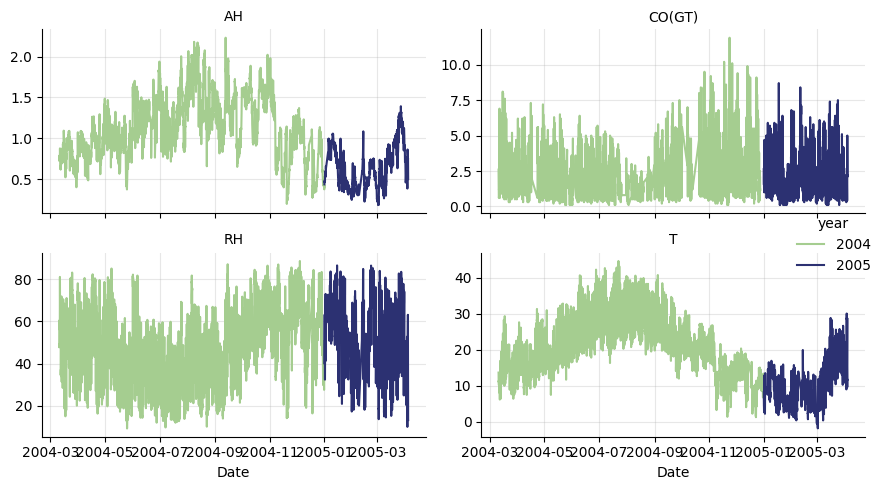

In [26]:


# If you don't already have it:
data["year"] = data["datetime"].dt.year

vars_to_plot = ["CO(GT)", "T", "RH", "AH"]

long = data.melt(
    id_vars=["datetime", "year"],
    value_vars=vars_to_plot,
    var_name="variable",
    value_name="value"
)

# Sort to avoid line zig-zags
long = long.sort_values(["variable", "year", "datetime"])

g = sns.relplot(
    data=long,
    x="datetime", y="value", hue="year",
    kind="line", palette="crest", linewidth=1.5, zorder=5,
    col="variable", col_wrap=2, height=2.5, aspect=1.6,
    legend=True,
    facet_kws={"sharey": False}  # different scales per variable
)

g.set_axis_labels("Date", "")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
cut_date = "2004-11-01"
train = data[data["Date"] < cut_date]
test  = data[data["Date"] >= cut_date]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(data):
    train, test = data.iloc[train_idx], data.iloc[test_idx]
    # fit model on train, evaluate on test
